In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [3]:
without_mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

Number of with mask images: 3725
Number of without mask images: 3828


In [5]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [6]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
len(data)
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [8]:
X = np.array(data)
Y = np.array(labels)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [10]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotation range (degrees)
    width_shift_range=0.1,  # Fraction of total width for horizontal shift
    height_shift_range=0.1, # Fraction of total height for vertical shift
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Method for filling in newly created pixels
)

# Specify the original input data (X_train, Y_train)
# Reshape X_train if necessary (e.g., for images: X_train.reshape(-1, height, width, channels))

# Fit the ImageDataGenerator to the training data
datagen.fit(X_train)

# Specify the number of augmented samples you want to generate
num_augmented_samples = 1000

# Generate augmented samples and append them to the original data
augmented_data = []
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=num_augmented_samples):
    augmented_data.append((X_batch, Y_batch))
    if len(augmented_data) * num_augmented_samples >= 7:
        break

# Concatenate the original data with augmented data
X_augmented = np.concatenate([X_train] + [data[0] for data in augmented_data])
Y_augmented = np.concatenate([Y_train] + [data[1] for data in augmented_data])

# Shuffle the augmented data
shuffle_indices = np.random.permutation(len(X_augmented))
X_augmented = X_augmented[shuffle_indices]
Y_augmented = Y_augmented[shuffle_indices]

2024-05-27 11:43:48.337826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 11:43:48.337990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 11:43:48.474389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Train the model with EarlyStopping
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=20, callbacks=[early_stopping])


Epoch 1/20


I0000 00:00:1716810249.045681    1907 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


152/152 [==============================] - 9s 23ms/step - loss: 0.4700 - accuracy: 0.7974 - val_loss: 0.3410 - val_accuracy: 0.8668
Epoch 2/20
152/152 [==============================] - 2s 13ms/step - loss: 0.3038 - accuracy: 0.8761 - val_loss: 0.2638 - val_accuracy: 0.8792
Epoch 3/20
152/152 [==============================] - 2s 13ms/step - loss: 0.2629 - accuracy: 0.8936 - val_loss: 0.2171 - val_accuracy: 0.9181
Epoch 4/20
152/152 [==============================] - 2s 13ms/step - loss: 0.2354 - accuracy: 0.9063 - val_loss: 0.2586 - val_accuracy: 0.9074
Epoch 5/20
152/152 [==============================] - 2s 13ms/step - loss: 0.2016 - accuracy: 0.9226 - val_loss: 0.2055 - val_accuracy: 0.9206
Epoch 6/20
152/152 [==============================] - 2s 13ms/step - loss: 0.1863 - accuracy: 0.9280 - val_loss: 0.1849 - val_accuracy: 0.9289
Epoch 7/20
152/152 [==============================] - 2s 13ms/step - loss: 0.1840 - accuracy: 0.9313 - val_loss: 0.1921 - val_accuracy: 0.9380
Epoch 8/20

In [16]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2564 - accuracy: 0.9279
Test Accuracy = 0.9278623461723328


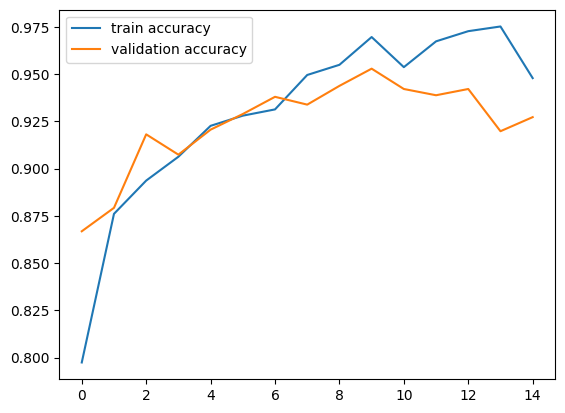

In [17]:
h = history

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

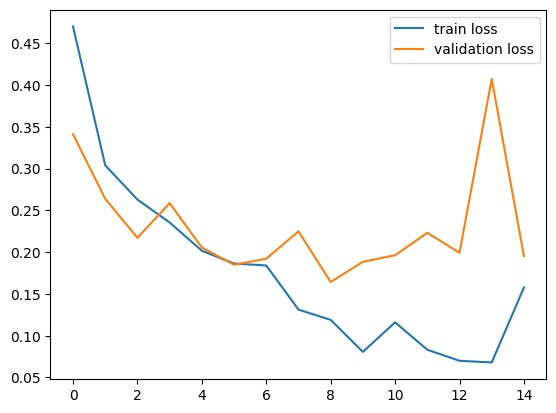

In [18]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step
The person in the image is wearing a mask


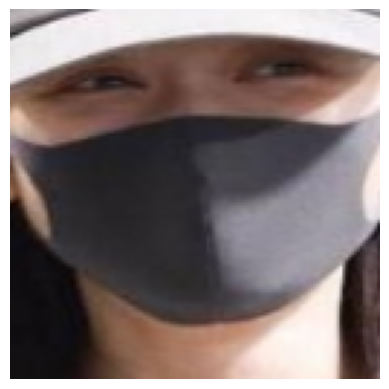

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = "/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1007.jpg"
input_image = cv2.imread(input_image_path)

# Resize the input image
input_image_resized = cv2.resize(input_image, (128,128))

# Scale the pixel values to [0, 1]
input_image_scaled = input_image_resized / 255.0

# Reshape the image for model prediction
input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

# Make prediction using the model
input_prediction = model.predict(input_image_reshaped)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Print the prediction result
if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')

# Display the input image
plt.imshow(cv2.cvtColor(input_image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 20ms/step
The person in the image is not wearing a mask


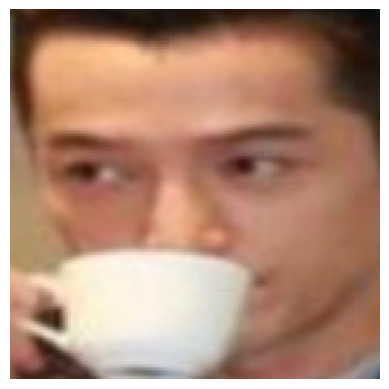

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image_path = "/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1002.jpg"
input_image = cv2.imread(input_image_path)

# Resize the input image
input_image_resized = cv2.resize(input_image, (128,128))

# Scale the pixel values to [0, 1]
input_image_scaled = input_image_resized / 255.0

# Reshape the image for model prediction
input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

# Make prediction using the model
input_prediction = model.predict(input_image_reshaped)

# Get the predicted label
input_pred_label = np.argmax(input_prediction)

# Print the prediction result
if input_pred_label == 1:
    print('The person in the image is not wearing a mask')
else:
    print('The person in the image is wearing a mask')

# Display the input image
plt.imshow(cv2.cvtColor(input_image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

48/48 [==============================] - 0s 5ms/step


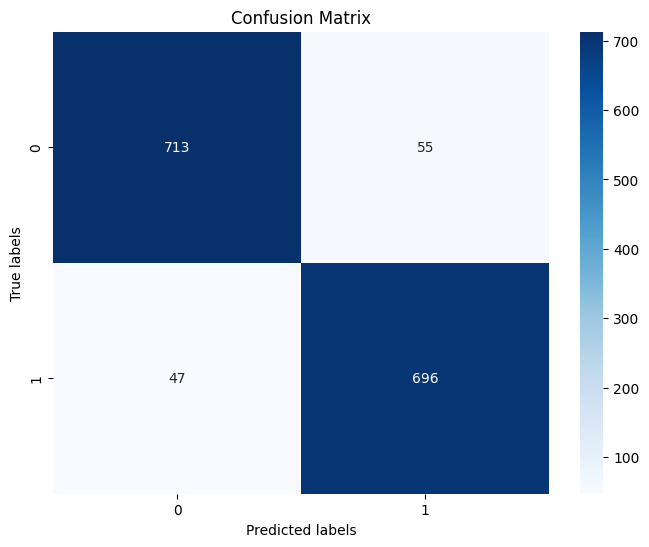

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the saved model
from tensorflow.keras.models import load_model

model = load_model('face_model')

# Make predictions on the test data
Y_pred_probabilities = model.predict(X_test_scaled)

Y_pred = np.argmax(Y_pred_probabilities, axis=1)
# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model in the native Keras format
model.save('face_model')  # No need to provide an extension like .keras